In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats

In [2]:
# NAICS (Industry) definitions

naics_dict = {# 0 : "Undefined",
              11: 'Agriculture, forestry, fishing and hunting',
              21 : 'Mining, quarrying, and oil and gas extraction',
              22 : 'Utilities',
              23 : 'Construction',
              31 : 'Manufacturing',
              32 : 'Manufacturing',
              33 : 'Manufacturing',
              42 : 'Wholesale trade',
              44 : 'Retail trade',
              45 : 'Retail trade',
              48 : 'Transportation and warehousing',
              49 : 'Transportation and warehousing',
              51 : 'Information',
              52 : 'Finance and insurance',
              53 : 'Real estate and rental and leasing',
              54 : 'Professional, scientific, and technical services',
              55 : 'Management of companies and enterprises',
              56 : 'Administrative and support and waste management and remediation services',
              61 : 'Educational services',
              62 : 'Health care and social assistance',
              71 : 'Arts, entertainment, and recreation',
              72 : 'Accommodation and food services',
              81 : 'Other services (except public administration)',
              92 : 'Public administration'}

In [3]:
# Read in Data

# set directory
data_dir = 'C:/Users/630125/Desktop/TEDS/Capstone Project/Jupyer Notebooks'

# read file
df = pd.read_csv(str(data_dir) + '/' + 'SBA_prepro.csv', index_col=False)
df = df.drop(columns=['Unnamed: 0'])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472007 entries, 0 to 472006
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ApprovalFY          472007 non-null  int64  
 1   DisbursementFY      472007 non-null  float64
 2   Term (Months)       472007 non-null  int64  
 3   Term (Years)        472007 non-null  float64
 4   DaysToDisbursement  472007 non-null  float64
 5   NumberOfEmployees   472007 non-null  int64  
 6   JobsCreated         472007 non-null  int64  
 7   JobsRetained        472007 non-null  int64  
 8   DisbursementGross   472007 non-null  float64
 9   GrAppv              472007 non-null  float64
 10  SBA_Appv            472007 non-null  float64
 11  Portion_SBA_Bank    472007 non-null  float64
 12  ApprovalDate        472007 non-null  object 
 13  DisbursementDate    472007 non-null  object 
 14  State               472007 non-null  object 
 15  Region              472007 non-nul

,ApprovalFY,DisbursementFY,Term (Months),Term (Years),DaysToDisbursement,NumberOfEmployees,JobsCreated,JobsRetained,DisbursementGross,GrAppv,...,State,Region,Industry,IsNewBusiness,IsFranchise,UrbanRural,RevLineCr,LowDoc,Recession,Default
0,1995,1995.0,60,5.0,59.0,8,0,0,15000.0,15000.0,...,AK,West,NaN,2.0,0,0,0.0,1.0,0,False
1,1998,1998.0,48,4.0,47.0,1,0,0,16000.0,16000.0,...,AK,West,NaN,1.0,0,0,NaN,0.0,0,False
2,2002,2002.0,120,10.0,26.0,39,1,39,260000.0,260000.0,...,AK,West,56.0,1.0,0,1,NaN,0.0,1,False
3,2003,2003.0,84,7.0,44.0,2,0,2,5000.0,5000.0,...,AK,West,45.0,1.0,0,1,1.0,0.0,1,False
4,2001,2001.0,60,5.0,136.0,16,0,16,161000.0,100000.0,...,AK,West,62.0,1.0,0,1,1.0,0.0,0,False


Proportion of loans that default

In [4]:
default = len(df[df['Default'] == True]) / len(df)
print("{}% of loans default".format(round(default * 100, 4)))

17.8135% of loans default


## Exploratory Data Analysis

Look at the shape and types of the data.

In [5]:
df.shape

(472007, 24)

In [6]:
df.dtypes

ApprovalFY              int64
DisbursementFY        float64
Term (Months)           int64
Term (Years)          float64
DaysToDisbursement    float64
NumberOfEmployees       int64
JobsCreated             int64
JobsRetained            int64
DisbursementGross     float64
GrAppv                float64
SBA_Appv              float64
Portion_SBA_Bank      float64
ApprovalDate           object
DisbursementDate       object
State                  object
Region                 object
Industry              float64
IsNewBusiness         float64
IsFranchise             int64
UrbanRural              int64
RevLineCr             float64
LowDoc                float64
Recession               int64
Default                  bool
dtype: object

Summary statistics for the numerical variables

In [7]:
num_cols = pd.DataFrame(df[['Term (Years)', 'DaysToDisbursement','NumberOfEmployees',
           'JobsCreated', 'JobsRetained', 'DisbursementGross', 'GrAppv',
           'SBA_Appv', 'Portion_SBA_Bank']])

numeric_data = num_cols.describe(include=['float', 'int'])
numeric_data_csv = numeric_data.to_csv('numeric_data.csv', index = True) # save to csv

numeric_data

,Term (Years),DaysToDisbursement,NumberOfEmployees,JobsCreated,JobsRetained,DisbursementGross,GrAppv,SBA_Appv,Portion_SBA_Bank
count,472007.000000,472007.000000,472007.000000,472007.000000,472007.000000,4.720070e+05,4.720070e+05,4.720070e+05,472007.000000
mean,9.278995,113.811077,10.487887,8.262075,10.547538,1.992233e+05,1.910703e+05,1.483346e+05,0.711821
std,6.592495,175.363973,24.567656,234.684000,235.267431,2.760752e+05,2.737396e+05,2.198723e+05,0.173281
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,1.000000e+03,5.000000e+02,0.028140
25%,5.000000,31.000000,2.000000,0.000000,0.000000,4.300000e+04,3.500000e+04,2.160000e+04,0.500000
50%,7.000000,60.000000,4.000000,0.000000,1.000000,1.000000e+05,9.000000e+04,6.250000e+04,0.750000
75%,10.000000,120.000000,10.000000,1.000000,4.000000,2.370000e+05,2.250000e+05,1.750000e+05,0.850000
max,43.917000,4907.000000,1500.000000,8800.000000,9500.000000,1.144632e+07,5.000000e+06,4.500000e+06,1.000000


- The average number of employees of a small business is 11.26, but with a standard deviation of 68.88, which means there is a wide spread of distribution
- Also, the number of created jobs and retained jobs have an average of 8.27 and 10.55, respectively, but both have a very large standard deviation of approx. 235, so again the distribution is very spread out
- The SBA had an average guaranteed proportion of 0.712, with a standard deviation of 0.17

In [8]:
df.describe(include = ['object', 'bool'])

,ApprovalDate,DisbursementDate,State,Region,Default
count,472007,472007,472007,472007,472007
unique,8335,6012,51,4,2
top,1993-07-07,1995-04-30,CA,West,False
freq,620,5646,68482,137797,387926


- California has the largest amount of SBA loans, and additionally states within the Western region of United States had the most SBA loans overall.

Next, look at the correlations between the numerical values. We see that variables with a high correlation are highly related - for example, the DisbursementGross, GrAppv, and SBA_Appv variables are generally similar values.

C:\Users\630125\AppData\Local\Temp\ipykernel_12788\1169630518.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

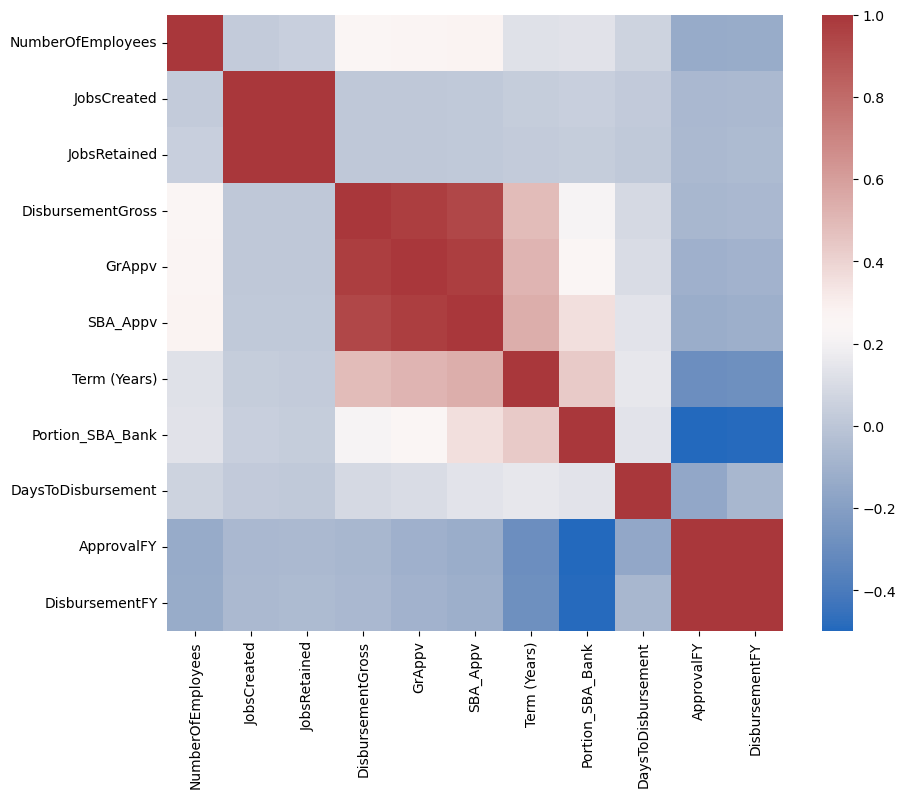

In [9]:
# run correlation matrix and plot

num_vars = pd.DataFrame(df[['NumberOfEmployees', 'JobsCreated', 'JobsRetained', 'DisbursementGross', 'GrAppv', 'SBA_Appv',
                           'Term (Years)', 'Portion_SBA_Bank', 'DaysToDisbursement', 'ApprovalFY', 'DisbursementFY']])

f, ax = plt.subplots(figsize=(10, 8))
corr = num_vars.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap='vlag',
            square=True, ax=ax)

In [10]:
corr

,NumberOfEmployees,JobsCreated,JobsRetained,DisbursementGross,GrAppv,SBA_Appv,Term (Years),Portion_SBA_Bank,DaysToDisbursement,ApprovalFY,DisbursementFY
NumberOfEmployees,1.000000,0.024126,0.041331,0.261707,0.265645,0.274775,0.127490,0.132257,0.061307,-0.137621,-0.133469
JobsCreated,0.024126,1.000000,0.994545,0.007263,0.008431,0.014420,0.028500,0.041074,0.019867,-0.067409,-0.065228
JobsRetained,0.041331,0.994545,1.000000,0.009582,0.009988,0.014605,0.026040,0.034217,0.016510,-0.061129,-0.059191
DisbursementGross,0.261707,0.007263,0.009582,1.000000,0.973598,0.941301,0.485256,0.211076,0.087076,-0.073568,-0.066506
GrAppv,0.265645,0.008431,0.009988,0.973598,1.000000,0.972605,0.518069,0.259874,0.100037,-0.106579,-0.098744
SBA_Appv,0.274775,0.014420,0.014605,0.941301,0.972605,1.000000,0.542642,0.360495,0.136768,-0.126101,-0.115066
Term (Years),0.127490,0.028500,0.026040,0.485256,0.518069,0.542642,1.000000,0.433068,0.152714,-0.293053,-0.282624
Portion_SBA_Bank,0.132257,0.041074,0.034217,0.211076,0.259874,0.360495,0.433068,1.000000,0.135311,-0.498407,-0.490776
DaysToDisbursement,0.061307,0.019867,0.016510,0.087076,0.100037,0.136768,0.152714,0.135311,1.000000,-0.158177,-0.074177
ApprovalFY,-0.137621,-0.067409,-0.061129,-0.073568,-0.106579,-0.126101,-0.293053,-0.498407,-0.158177,1.000000,0.994489


Now we'll look at the rate of default across region, state, and industry

In [11]:
cols = ['Region', 'State', 'Industry']
for col in cols:
    display(pd.crosstab(df['Default'], df[col], normalize = 'index'))

Region,Midwest,Northeast,South,West
Default,,,,
False,0.224731,0.208148,0.275241,0.291880
True,0.227007,0.206670,0.274117,0.292206


State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Default,,,,,,,,,,,,,,,,,,,,,
False,0.002704,0.009422,0.007061,0.019450,0.145324,0.022674,0.013670,0.001714,0.002439,0.045800,...,0.004965,0.010445,0.079074,0.020553,0.014753,0.006030,0.026152,0.023236,0.003684,0.003163
True,0.002664,0.009645,0.007124,0.020266,0.143992,0.023168,0.013439,0.002307,0.002664,0.046527,...,0.005007,0.010359,0.077616,0.020504,0.014569,0.006149,0.025690,0.023251,0.003734,0.002997


Industry,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,...,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
Default,,,,,,,,,,,,,,,,,,,,,
False,0.014397,0.00299,0.000963,0.090563,0.017343,0.027038,0.059810,0.070195,0.118976,0.059197,...,0.017308,0.098802,0.000416,0.044824,0.008704,0.088837,0.021355,0.094603,0.106613,0.000388
True,0.005811,0.00121,0.000625,0.108029,0.016156,0.020851,0.037433,0.067472,0.134704,0.070131,...,0.028417,0.092697,0.000226,0.054533,0.010984,0.040823,0.021063,0.105064,0.101979,0.000186


# Visualizations

C:\Users\630125\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


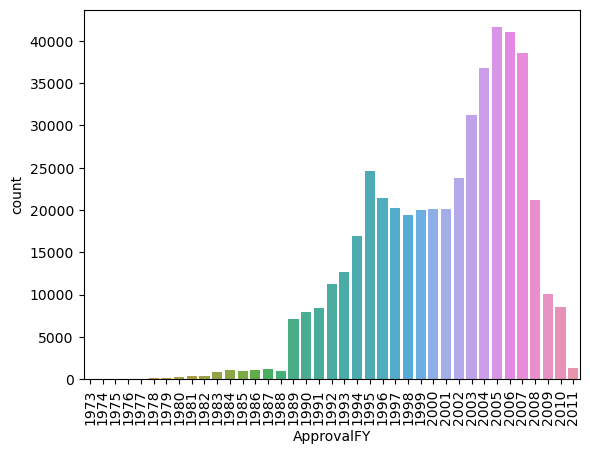

In [12]:
# distrubtion of loans over time

sns.countplot(df['ApprovalFY'])
plt.xticks(rotation = 90)
plt.show()

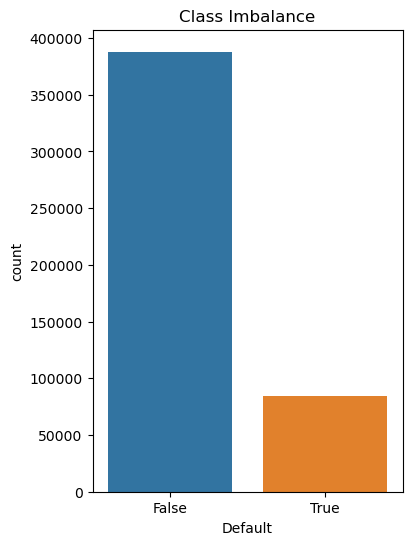

In [13]:
# check weight of each class
# in this dataset, there is a severe class imbalance, which will affect modeling

plt.figure(figsize = (4, 6))
sns.countplot(x = 'Default', data = df, orient = 'v')
plt.title("Class Imbalance")
plt.show()

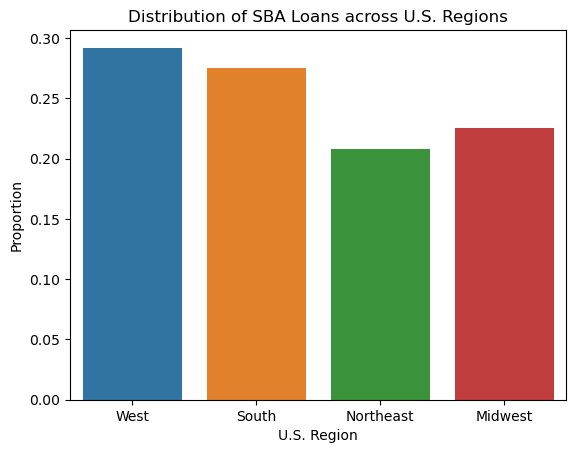

In [14]:
# Distribution of loans over major U.S. regions

west = len(df[df['Region'] == 'West']) / len(df)
south = len(df[df['Region'] == 'South']) / len(df)
northeast = len(df[df['Region'] == 'Northeast']) / len(df)
midwest = len(df[df['Region'] == 'Midwest']) / len(df)

sns.barplot(x = ['West', 'South', 'Northeast', 'Midwest'], y = [west, south, northeast, midwest])
plt.ylabel("Proportion")
plt.xlabel("U.S. Region")
plt.title("Distribution of SBA Loans across U.S. Regions")
plt.show()

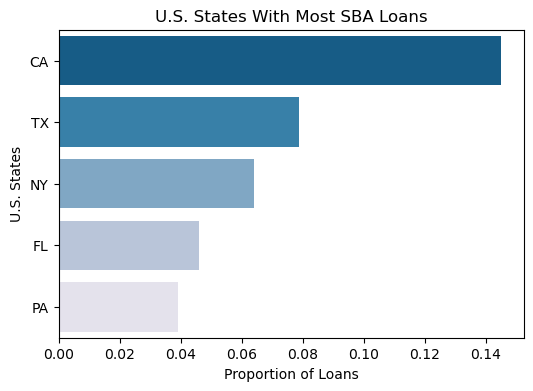

In [15]:
# Top 5 U.S. states with most SBA loans
# The amount of SBA loans is closely related to the state population
# California, Texas, New York, Florida, and Pennsylvania are the states with the 5 largest populations

states = list(df['State'].unique())
proportions = {}

for state in states:
    proportion = len(df[df['State'] == state]) / len(df)
    proportions[state] = proportion

proportions = {k: v for k, v in sorted(proportions.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize = (6,4))
sns.barplot(y = list(proportions.keys())[0:5], x = list(proportions.values())[0:5], palette = "PuBu_r")
plt.xlabel("Proportion of Loans")
plt.ylabel("U.S. States")
plt.title("U.S. States With Most SBA Loans")
plt.show()

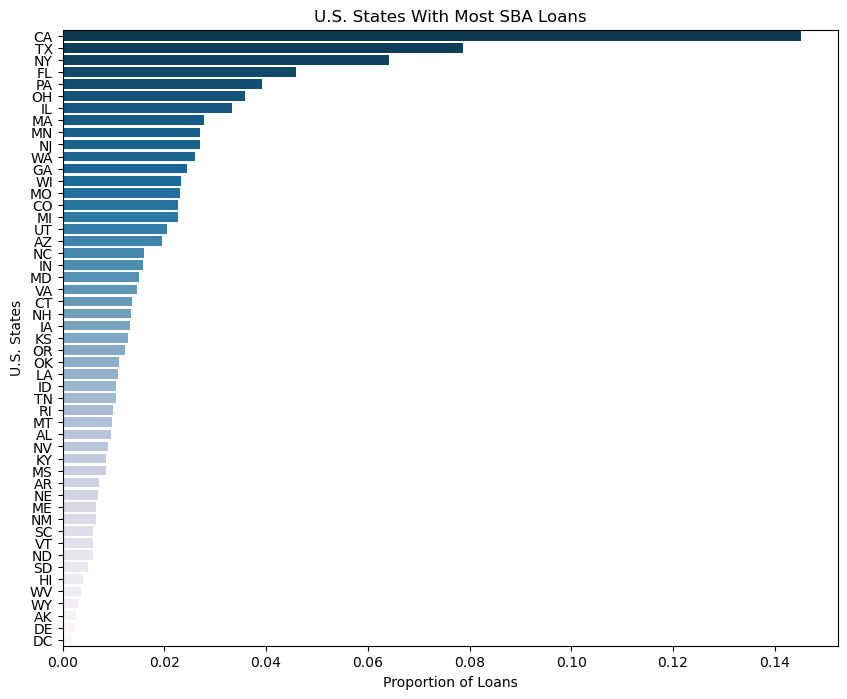

In [16]:
# distribution of SBA loans across all states and D.C.

plt.figure(figsize = (10,8))
sns.barplot(y = list(proportions.keys()), x = list(proportions.values()), palette = "PuBu_r")
plt.xlabel("Proportion of Loans")
plt.ylabel("U.S. States")
plt.title("U.S. States With Most SBA Loans")
plt.show()

Save default rates by state to csv file

In [17]:
state_info = pd.crosstab(df['Default'], df['State'], normalize = 'columns')
state_info

state_info_csv = state_info.to_csv('state_info.csv', index = True)

In [18]:
display(pd.crosstab(df['Default'], df['State'], normalize = 'index'))

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Default,,,,,,,,,,,,,,,,,,,,,
False,0.002704,0.009422,0.007061,0.019450,0.145324,0.022674,0.013670,0.001714,0.002439,0.045800,...,0.004965,0.010445,0.079074,0.020553,0.014753,0.006030,0.026152,0.023236,0.003684,0.003163
True,0.002664,0.009645,0.007124,0.020266,0.143992,0.023168,0.013439,0.002307,0.002664,0.046527,...,0.005007,0.010359,0.077616,0.020504,0.014569,0.006149,0.025690,0.023251,0.003734,0.002997


In [19]:
# the top ten states with the most SBA loans account for over 50% of SBA loans

print(sum(list(proportions.values())[0:10]))
list(proportions.keys())[0:10]

0.5241426504267945


['CA', 'TX', 'NY', 'FL', 'PA', 'OH', 'IL', 'MA', 'MN', 'NJ']

Save default rates by year to csv file

In [20]:
approvalFY_info = pd.crosstab(df['Default'], df['ApprovalFY'], normalize = 'columns')


approvalFY_info_csv = approvalFY_info.to_csv('approvalFY_info.csv', index = True)

In [21]:
approvalFY_info

ApprovalFY,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Default,,,,,,,,,,,,,,,,,,,,,
False,0.0,0.083333,0.095238,0.027778,0.066667,0.023256,0.047368,0.042308,0.282738,0.595181,...,0.884382,0.854976,0.815598,0.74878,0.651605,0.571766,0.587757,0.791999,0.857725,0.889874
True,1.0,0.916667,0.904762,0.972222,0.933333,0.976744,0.952632,0.957692,0.717262,0.404819,...,0.115618,0.145024,0.184402,0.25122,0.348395,0.428234,0.412243,0.208001,0.142275,0.110126


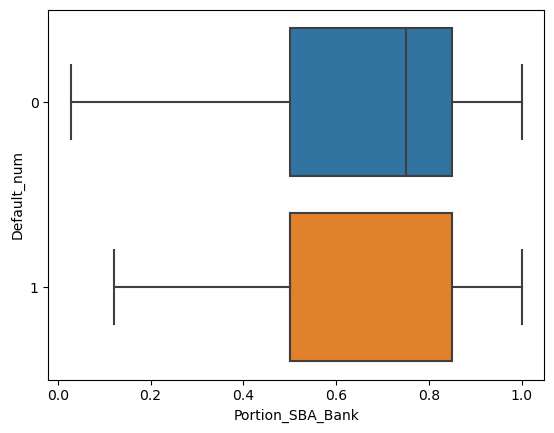

In [22]:
# boxplots comparing defaulted loans and paid in full loans

df['Default_num'] = np.where(df['Default'] == True, 1, 0) # recode loan classification as 1 for default and 0 for paid in full
sns.boxplot(y = df['Default_num'].astype('category'), x = 'Portion_SBA_Bank', data = df)
plt.show()

There are lots of outliers in the numerical data

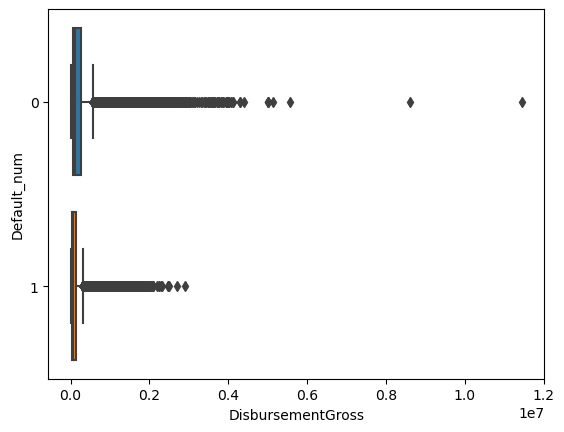

In [23]:
# boxplot of disbursement amount between defaulted and paid in full loans
sns.boxplot(y = df['Default_num'].astype('category'), x = 'DisbursementGross', data = df)
plt.show()

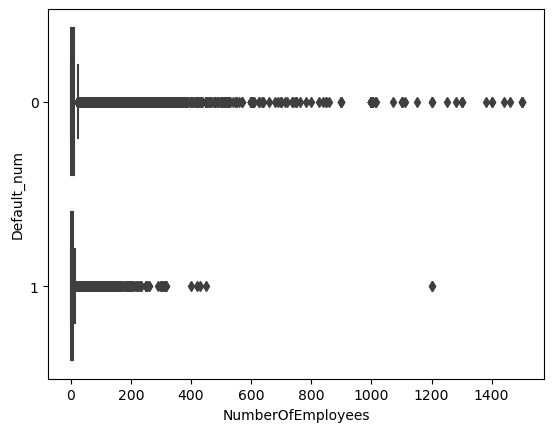

In [24]:
# boxplot of number of employees between defaulted and paid in full loans
sns.boxplot(y = df['Default_num'].astype('category'), x = 'NumberOfEmployees', data = df)
plt.show()

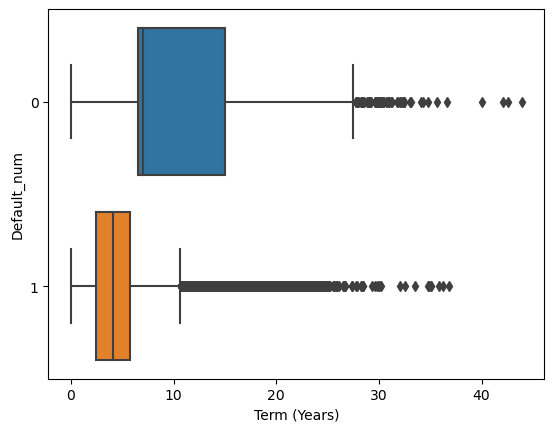

In [25]:
# boxplot of term length between defaulted and paid in full loans
sns.boxplot(y = df['Default_num'].astype('category'), x = 'Term (Years)', data = df)
plt.show()

### Comparing defaulted and charged-off loans across industries

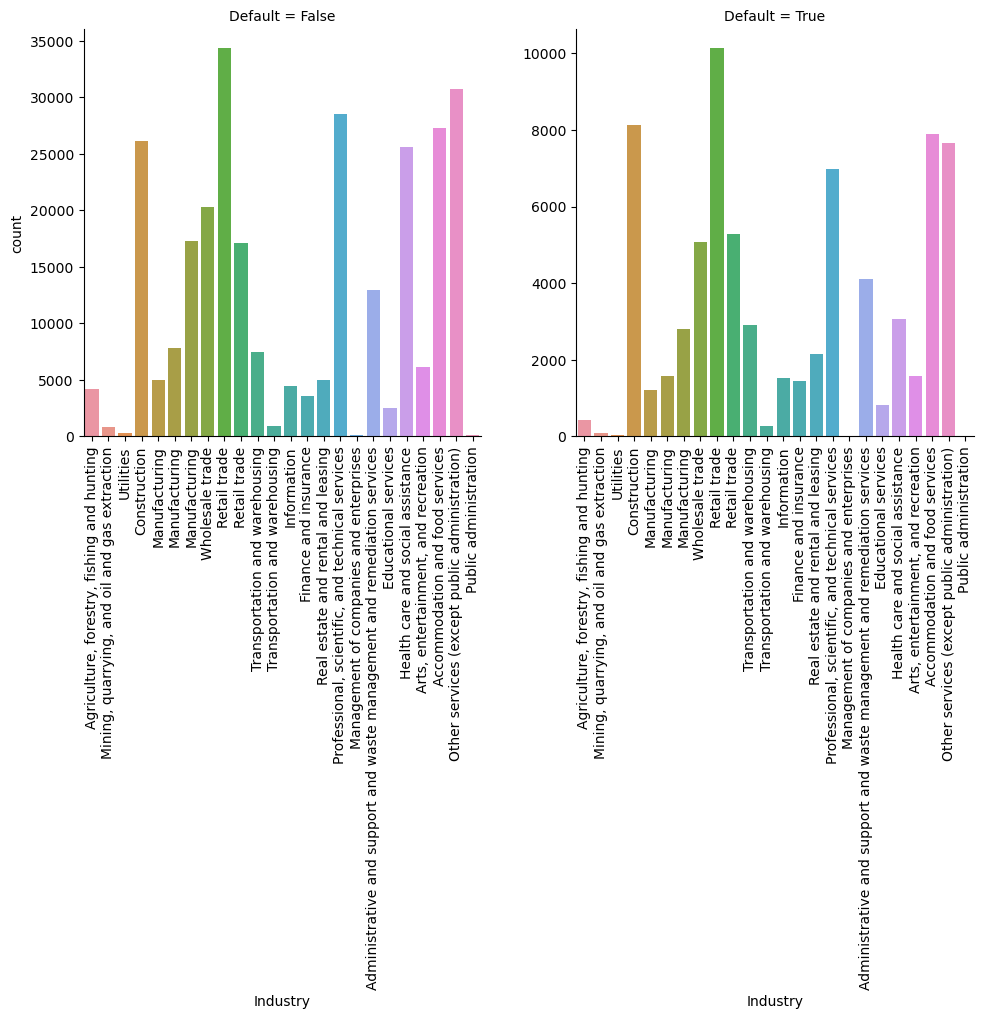

In [26]:
g = sns.catplot(x = 'Industry', kind = 'count', col = 'Default', data = df, sharey = False)
g.set_xticklabels(list(naics_dict.values()), rotation = 90)
plt.show()

### Comparing loans across industries during the 2008 Recession and outside the recession

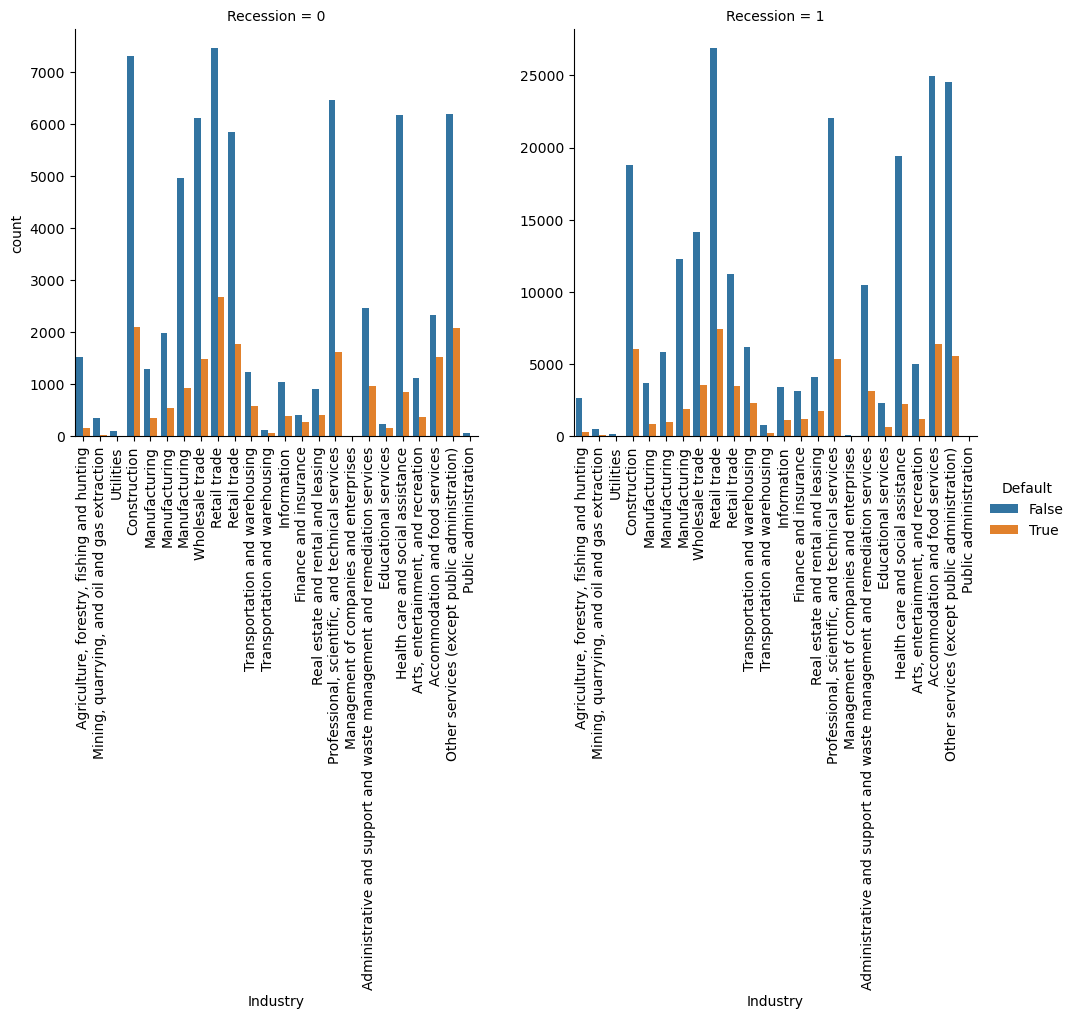

In [27]:
g = sns.catplot(x = 'Industry', kind = 'count', col = 'Recession', hue = 'Default', data = df, sharey = False)
g.set_xticklabels(list(naics_dict.values()), rotation = 90)
plt.show()

### Comparing defaulted and charged-off loans across U.S. regions

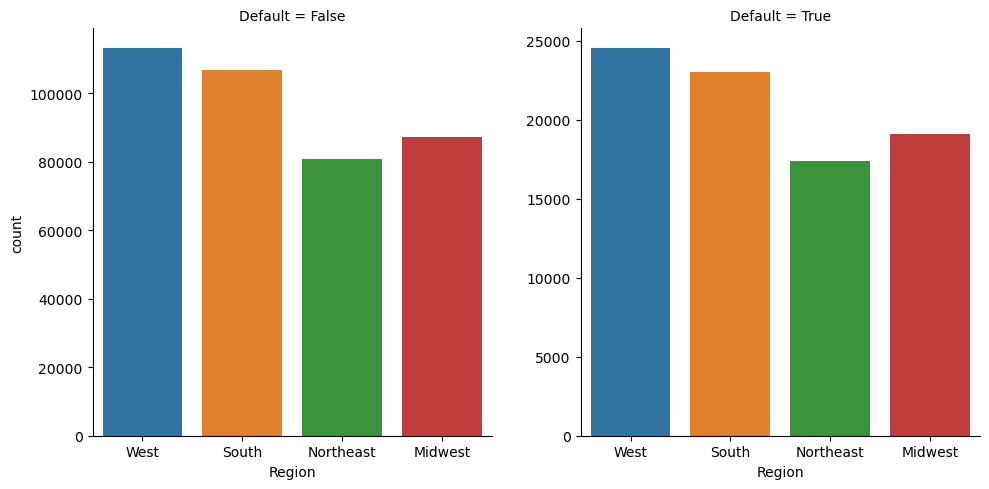

In [28]:
g = sns.catplot(x = 'Region', kind = 'count', col = 'Default', data = df, sharey = False)
g.set_xticklabels()
plt.show()

### Comparing defaulted and charged-off loans across Rural, Urban, and undefined businesses

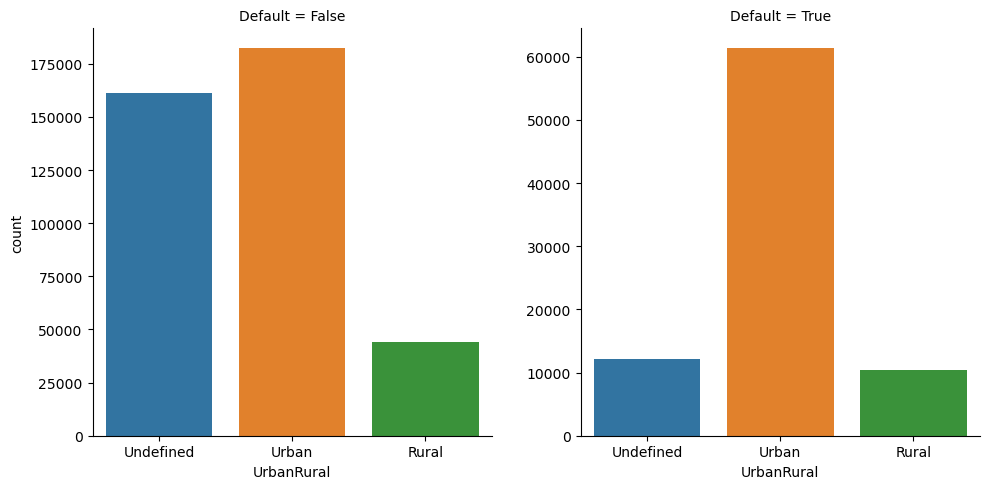

In [29]:
g = sns.catplot(x = 'UrbanRural', kind = 'count', col = 'Default', data = df, sharey = False)
g.set_xticklabels(['Undefined', 'Urban', 'Rural'])
plt.show()

### Looking at data over time

In [30]:
# group data by year, take means

df_year = df[df['ApprovalFY'] != 1966]
df_grouped_year = df_year.groupby('ApprovalFY')
df_grouped_year = df_grouped_year[['Term (Years)', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'Portion_SBA_Bank']].mean().reset_index()
df_grouped_year = df_grouped_year.set_index("ApprovalFY")

#### Average Loan Amount over Time

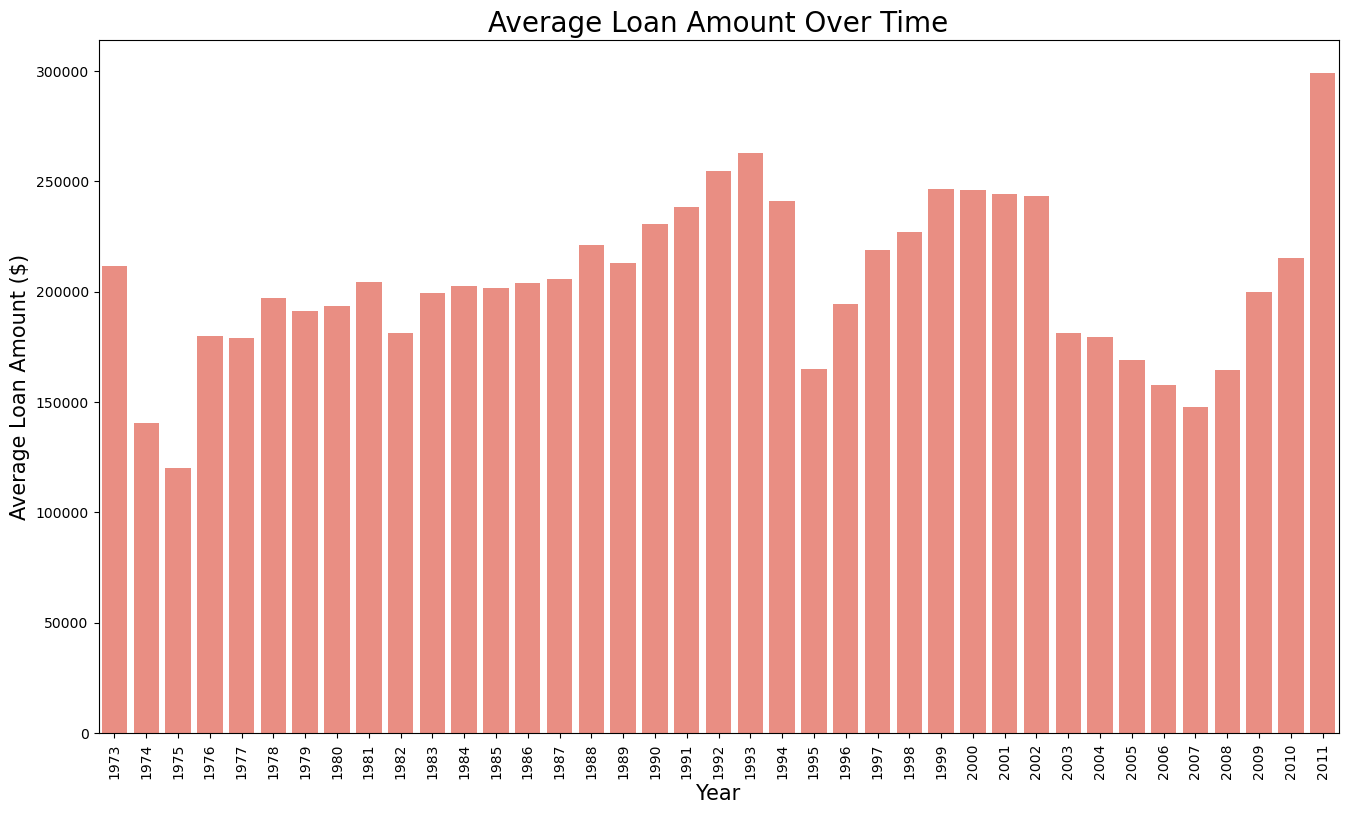

In [31]:
# loan amount over time
f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x = df_grouped_year.index, y = "DisbursementGross", color = 'Salmon', data=df_grouped_year)
plt.title('Average Loan Amount Over Time', fontsize=20)
plt.xlabel('Year', fontsize=15); plt.xticks(rotation = 90)
plt.ylabel('Average Loan Amount ($)', fontsize=15)
f.savefig('C:/Users/630125/Desktop/TEDS/Capstone Project/plots/loan_amount_over_time.png')

#### Term Length Over Time

<Figure size 640x480 with 0 Axes>

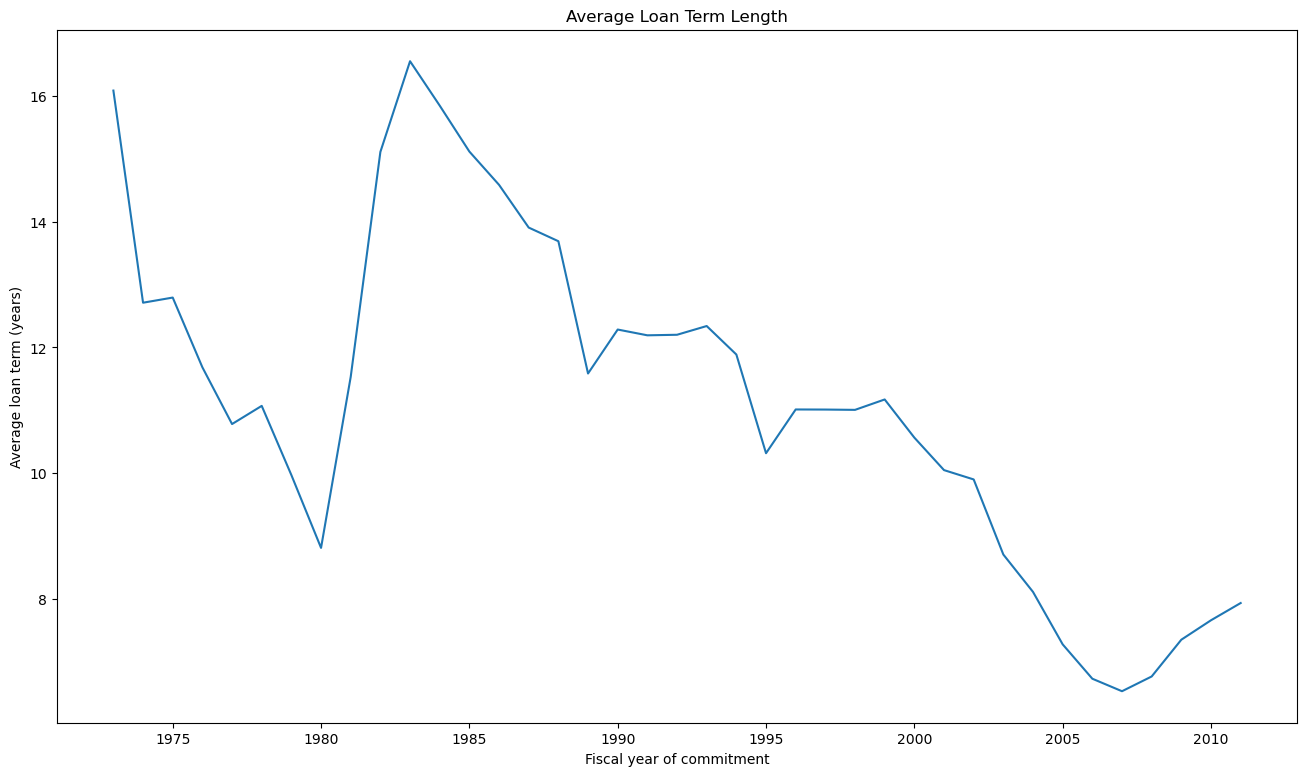

In [32]:
# term length over time
plt.clf()
f, ax = plt.subplots(figsize=(16,9))
plt.plot(df_grouped_year['Term (Years)'])
plt.xlabel("Fiscal year of commitment")
plt.ylabel("Average loan term (years)")
plt.title("Average Loan Term Length")
f.savefig('C:/Users/630125/Desktop/TEDS/Capstone Project/plots/average_loan_term.png')

#### Bank-approved amount vs. SBA-backed amount over time

<Figure size 640x480 with 0 Axes>

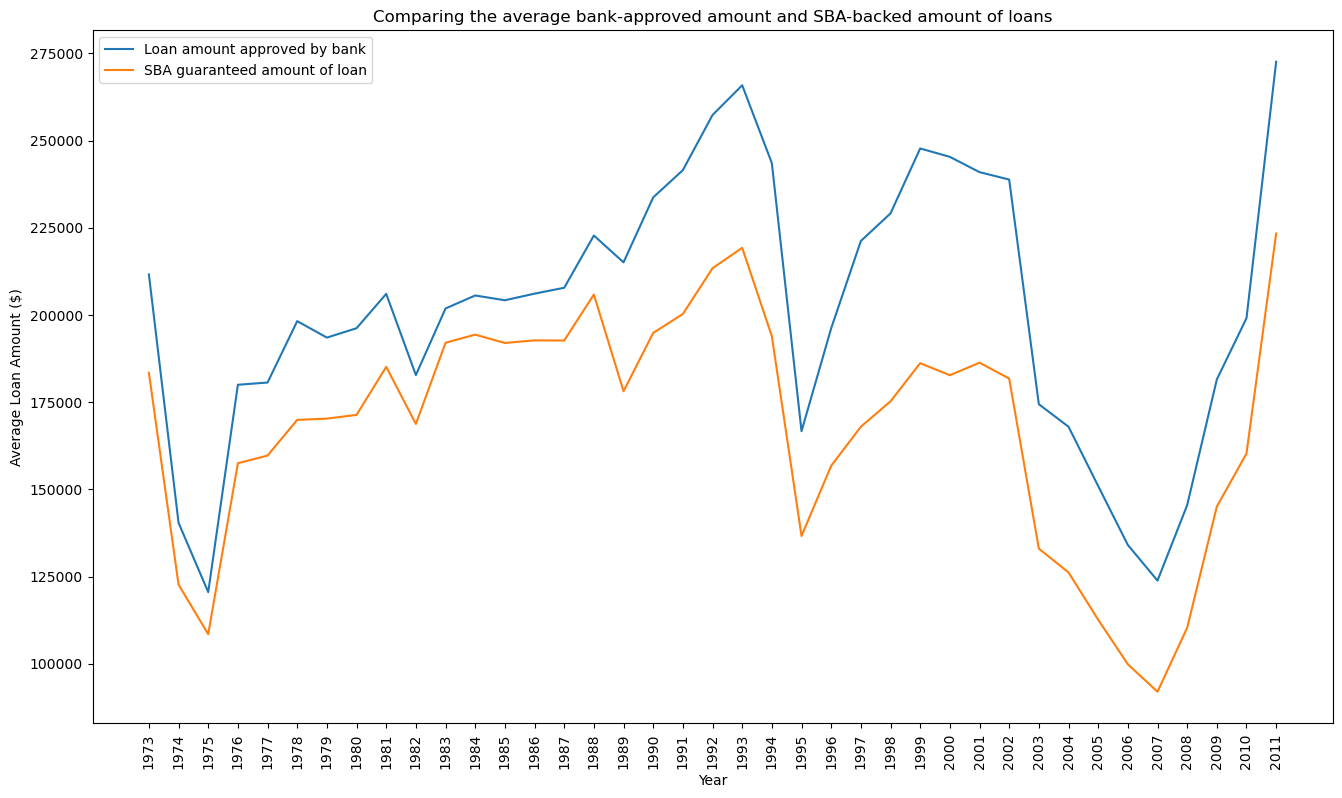

In [33]:
# Bank loan vs amount covered by SBA over time
plt.clf()
f, ax = plt.subplots(figsize=(16,9))
plt.plot(df_grouped_year['GrAppv'])
plt.plot(df_grouped_year['SBA_Appv'])
plt.ylabel ("Average Loan Amount ($)")
plt.xlabel("Year"); plt.xticks(np.arange(min(df_grouped_year.index), max(df_grouped_year.index)+1, 1.0), rotation = 90)
plt.title("Comparing the average bank-approved amount and SBA-backed amount of loans")
plt.legend(['Loan amount approved by bank', 'SBA guaranteed amount of loan'])
f.savefig('C:/Users/630125/Desktop/TEDS/Capstone Project/plots/SBA_bank_loan_over_time.png')

<Figure size 640x480 with 0 Axes>

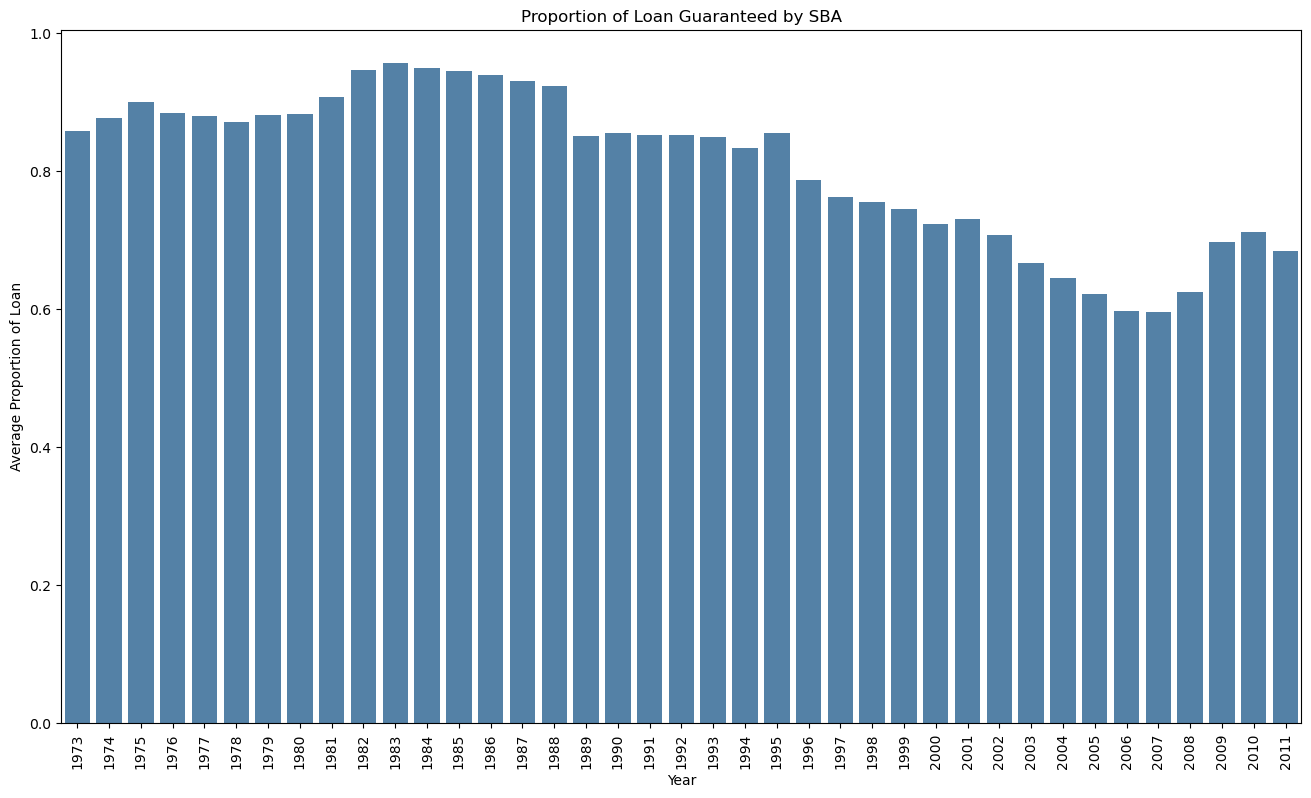

In [34]:
# proportion of SBA guaranteed amount over time
plt.clf()
f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x = df_grouped_year.index, y = 'Portion_SBA_Bank', data = df_grouped_year, color = 'steelblue')
plt.title('Proportion of Loan Guaranteed by SBA')
plt.ylabel ("Average Proportion of Loan")
plt.xlabel("Year"); plt.xticks(rotation = 90)
f.savefig('C:/Users/630125/Desktop/TEDS/Capstone Project/plots/proportion_SBA_guaranteed.png')

In [35]:
# replace industry codes with their actual names
df_adj = df
df_adj['Industry'] = df_adj['Industry'].map(naics_dict)
df_adj

,ApprovalFY,DisbursementFY,Term (Months),Term (Years),DaysToDisbursement,NumberOfEmployees,JobsCreated,JobsRetained,DisbursementGross,GrAppv,...,Region,Industry,IsNewBusiness,IsFranchise,UrbanRural,RevLineCr,LowDoc,Recession,Default,Default_num
0,1995,1995.0,60,5.000,59.0,8,0,0,15000.0,15000.0,...,West,NaN,2.0,0,0,0.0,1.0,0,False,0
1,1998,1998.0,48,4.000,47.0,1,0,0,16000.0,16000.0,...,West,NaN,1.0,0,0,NaN,0.0,0,False,0
2,2002,2002.0,120,10.000,26.0,39,1,39,260000.0,260000.0,...,West,Administrative and support and waste managemen...,1.0,0,1,NaN,0.0,1,False,0
3,2003,2003.0,84,7.000,44.0,2,0,2,5000.0,5000.0,...,West,Retail trade,1.0,0,1,1.0,0.0,1,False,0
4,2001,2001.0,60,5.000,136.0,16,0,16,161000.0,100000.0,...,West,Health care and social assistance,1.0,0,1,1.0,0.0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472002,1996,1996.0,84,7.000,136.0,1,0,0,58000.0,58000.0,...,West,Construction,1.0,0,0,0.0,1.0,0,False,0
472003,2007,2006.0,51,4.250,2.0,3,3,3,15000.0,15000.0,...,South,Construction,1.0,0,1,0.0,0.0,1,True,1
472004,1998,1998.0,300,25.000,34.0,20,0,0,382000.0,382000.0,...,Northeast,Administrative and support and waste managemen...,1.0,0,0,0.0,0.0,1,False,0
472005,2007,2007.0,5,0.417,49.0,11,0,11,189831.0,90000.0,...,Northeast,Wholesale trade,1.0,0,1,1.0,0.0,1,True,1


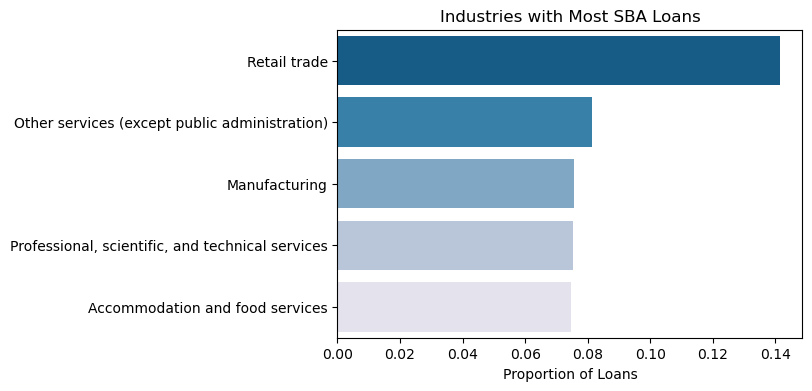

In [36]:
# top 5 industries with most SBA loans

industries = list(df_adj['Industry'].unique())
proportions = {}

for item in industries:
    proportion = len(df_adj[df_adj['Industry'] == item]) / len(df_adj)
    proportions[item] = proportion

proportions = {k: v for k, v in sorted(proportions.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize = (6,4))
sns.barplot(y = list(proportions.keys())[0:5], x = list(proportions.values())[0:5], palette = "PuBu_r")
plt.xlabel("Proportion of Loans")
plt.title("Industries with Most SBA Loans")
plt.show()

Save default rates by industry to csv file

In [37]:
industry_info = pd.crosstab(df_adj['Default'], df_adj['Industry'], normalize = 'columns')
industry_info

industry_info_csv = industry_info.to_csv('industry_info.csv', index = True)

In [38]:
display(pd.crosstab(df_adj['Default'], df_adj['Industry'], normalize = 'index'))

Industry,Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting","Arts, entertainment, and recreation",Construction,Educational services,Finance and insurance,Health care and social assistance,Information,Management of companies and enterprises,Manufacturing,"Mining, quarrying, and oil and gas extraction",Other services (except public administration),"Professional, scientific, and technical services",Public administration,Real estate and rental and leasing,Retail trade,Transportation and warehousing,Utilities,Wholesale trade
Default,,,,,,,,,,,,,,,,,,,,
False,0.094603,0.044824,0.014397,0.021355,0.090563,0.008704,0.012384,0.088837,0.015419,0.000416,0.104191,0.00299,0.106613,0.098802,0.000388,0.017308,0.178173,0.028874,0.000963,0.070195
True,0.105064,0.054533,0.005811,0.021063,0.108029,0.010984,0.019255,0.040823,0.020252,0.000226,0.074440,0.00121,0.101979,0.092697,0.000186,0.028417,0.204835,0.042100,0.000625,0.067472


Text(0, 0.5, 'Loan Amount ($)')

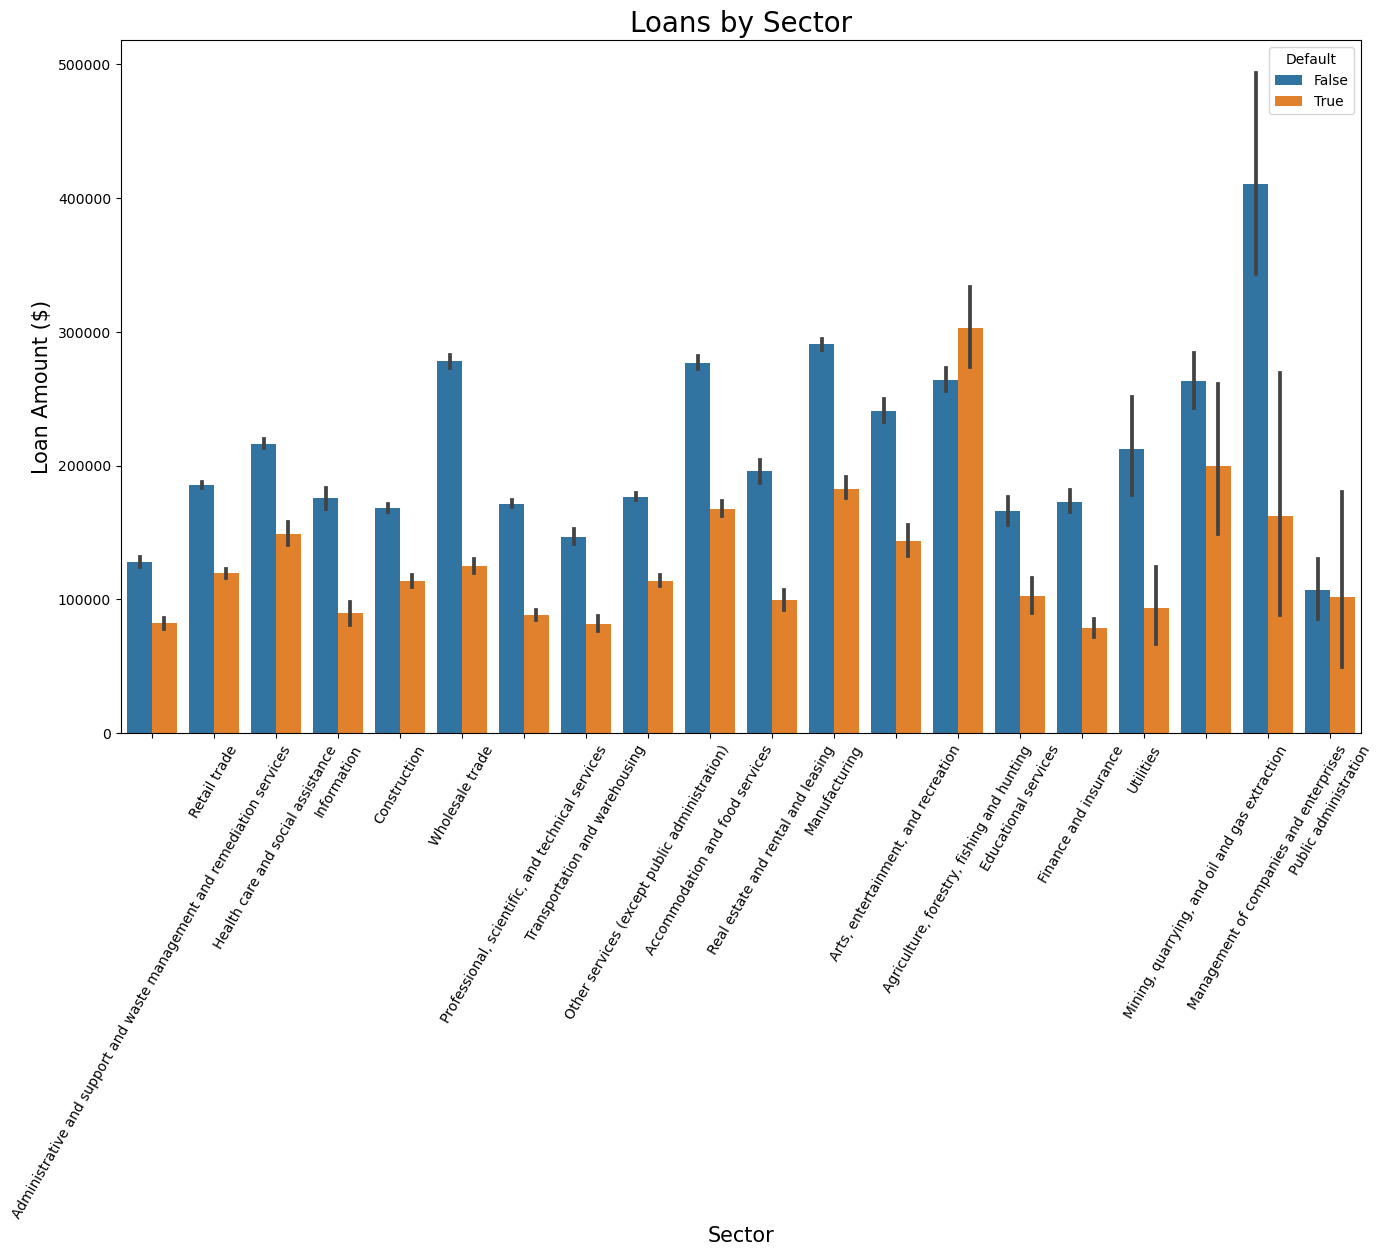

In [39]:
# loan amount by sector

f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x = df_adj['Industry'], y = df_adj['DisbursementGross'], hue = df_adj['Default'])
plt.title('Loans by Sector', fontsize=20)
plt.xlabel('Sector', fontsize=15); plt.xticks(rotation = 60)
# ax.set_xticklabels(list(naics_dict.values()))
plt.ylabel('Loan Amount ($)', fontsize=15)